### Case Study: How do annual members and casual riders use Cyclistic bikes differently?

This analysis is based on the Cyclistic bike-share analysis case study, which is part of the Google Data Analytics Professional Certification capstone project. 

Cyclistic is a fictitious Chicago-based bike-sharing company.

In this case study, the phases of Google data analysis are followed: ask, prepare, process, analyze, share, and act.

This RMarkdown report, created with Rstudio, focuses on the Prepare, Process, Analyze, Visualize, Share, and Act phases.


You can find a detailed analysis and documentation of its phases  [here](https://docs.google.com/document/d/1tRSRAdU-vXw_QFkk6xtROzSNzotKwZqpSmwgzi_Nfxg/edit#heading=h.qags1g1r4txe)

Final Presentation - [Cyclistic bike-share analysis case study](https://docs.google.com/presentation/d/1jtr2FQtUo0X9GrIjNSLkcMmf5Sf0jAHX9OSTJtIxKVY/edit#slide=id.p)

## Prepare

### Step 1: Setting up my environment in R
Setting up my environment for analysis and visualization using Rstudio by calling the required libraries, loading the `tidyverse`, `lubridate`, `janitor`, `skimr`, `dplyr`, `knitr`, and `ggplot2`.

**NB:** The respective packages had previously been installed, so the libraries were loaded directly.


In [141]:
library(tidyverse)#transform and better present data
library(readxl) #import excel files into R
library(janitor) #examine and clean dirty data
library(lubridate)  #process date-time attributes
library(skimr) #provides alternative summary statistics
library(dplyr) #eases data manipulation
library(ggplot2)  #visualize data
library(knitr) #create new markdown document

### Step 2: Import the Cyclistic-divvy trip data into R

R is loaded with the `(.xlsx)` files for cyclistic bike-share divvy trip data for each month of the year 2022, and a dataframe is created.

In [142]:
cyclistic_df_1   <- read_excel("../input/cyclistic-2022/202201-divvy-tripdata.xlsx")
cyclistic_df_2   <- read_excel("../input/cyclistic-2022/202202-divvy-tripdata.xlsx")
cyclistic_df_3   <- read_excel("../input/cyclistic-2022/202203-divvy-tripdata.xlsx")
cyclistic_df_4   <- read_excel("../input/cyclistic-2022/202204-divvy-tripdata.xlsx")
cyclistic_df_5   <- read_excel("../input/cyclistic-2022/202205-divvy-tripdata.xlsx")
cyclistic_df_6   <- read_excel("../input/cyclistic-2022/202206-divvy-tripdata.xlsx")
cyclistic_df_7   <- read_excel("../input/cyclistic-2022/202207-divvy-tripdata.xlsx")
cyclistic_df_8   <- read_excel("../input/cyclistic-2022/202208-divvy-tripdata.xlsx")
cyclistic_df_9   <- read_excel("../input/cyclistic-2022/202209-divvy-tripdata.xlsx")
cyclistic_df_10  <- read_excel("../input/cyclistic-2022/202210-divvy-tripdata.xlsx")
cyclistic_df_11  <- read_excel("../input/cyclistic-2022/202211-divvy-tripdata.xlsx")
cyclistic_df_12  <- read_excel("../input/cyclistic-2022/202212-divvy-tripdata.xlsx")

### Step 3: Check the structure and column names of each of the dataframes

This was done using `str()` and `colnames()` to ensure that each dataframe maintained the same column names and had the same variable type.

**NB:** In this notebook, only that of January 2022 was checked, but on the Rstudio desktop, the structure of all the dataframes was properly checked and found to be appropriate and consistent. 

In [143]:
#dataframe structure
str(cyclistic_df_1)


tibble [103,770 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:103770] "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr [1:103770] "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:103770], format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXct[1:103770], format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr [1:103770] "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr [1:103770] "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr [1:103770] "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr [1:103770] "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num [1:103770] 42 42 41.9 42 41.

In [144]:
#column names
colnames(cyclistic_df_1)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

### Step 4: Combine each dataframe together.

Each of the 12 months' divvy trip dataframes was combined into one dataframe using the `rbind()` function. The newly combined dataframe will be named `all_trips`.

In [145]:
#rbind combines multiple data frames for data manipulation
all_trips <- rbind(cyclistic_df_1,cyclistic_df_2,cyclistic_df_3,cyclistic_df_4,cyclistic_df_5,cyclistic_df_6,cyclistic_df_7,cyclistic_df_8,cyclistic_df_9,cyclistic_df_10,cyclistic_df_11,cyclistic_df_12)

### Step 5: Preview the newly combined dataframe.

To gain additional insights about the data, the newly combined dataframe `(all_trips)` was previewed using the following functions: `str()`, `head()`, `as_tibble()`, `glimpse()`, `colnames()`, `nrow()`, `dim()`, `summary()`, and `skim_without_charts()`.

In [146]:
str(all_trips)

tibble [5,667,717 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5667717] "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr [1:5667717] "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5667717], format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXct[1:5667717], format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr [1:5667717] "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr [1:5667717] "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr [1:5667717] "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr [1:5667717] "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num [1:5667717] 42 42 

In [147]:
head(all_trips)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,3,5
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,4,2
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,4,3
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,15,3
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,6,5
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,3,3


In [148]:
glimpse(all_trips)

Rows: 5,667,717
Columns: 15
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7…
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ started_at         <dttm> 2022-01-13 11:59:47, 2022-01-10 08:41:56, 2022-01-…
$ ended_at           <dttm> 2022-01-13 12:02:44, 2022-01-10 08:46:17, 2022-01-…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13…
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr…
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",…
$ start_lat          <dbl> 42.01280, 42.01276, 41.92560, 41.98359, 41.87785, 4…
$ start_lng          <dbl> -87.66591, -87.66597, -87.65371, -87.66915, -87.624…
$ end_lat            <dbl> 42.01256, 42.01256, 41.92533, 41.96151, 41.88462, 4…
$ end_lng            <dbl> -87.67437, -87.67437, -87.66580, -87.67139, -87.627…
$ member_cas

In [149]:
colnames(all_trips)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

In [150]:
nrow(all_trips)

[1] 5667717

In [151]:
dim(all_trips)

[1] 5667717      15

In [152]:
summary(all_trips)

   ride_id          rideable_type        started_at                 
 Length:5667717     Length:5667717     Min.   :2022-01-01 00:00:05  
 Class :character   Class :character   1st Qu.:2022-05-28 19:21:05  
 Mode  :character   Mode  :character   Median :2022-07-22 15:03:59  
                                       Mean   :2022-07-20 07:21:18  
                                       3rd Qu.:2022-09-16 07:21:29  
                                       Max.   :2022-12-31 23:59:26  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2022-01-01 00:01:48   Length:5667717     Length:5667717    
 1st Qu.:2022-05-28 19:43:07   Class :character   Class :character  
 Median :2022-07-22 15:24:44   Mode  :character   Mode  :character  
 Mean   :2022-07-20 07:40:45                                        
 3rd Qu.:2022-09-16 07:39:03                                        
 Max.   :2023-01-02 04:56:45      

In [153]:
skim_without_charts(all_trips)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,ride_id,0,1.0000000,13,23,0,5667717,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,rideable_type,0,1.0000000,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,start_station_name,833064,0.8530159,7,64,0,1674,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,start_station_id,833064,0.8530159,3,44,0,1313,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,character,end_station_name,892742,0.8424865,9,64,0,1692,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,character,end_station_id,1212352,0.7860952,2,44,0,1342,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,character,member_casual,0,1.0000000,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,numeric,start_lat,0,1.0000000,NA,NA,NA,NA,NA,41.902216,0.04626109,41.64,41.88103,41.90000,41.93000,45.63503,NA,NA,NA,NA
9,numeric,start_lng,0,1.0000000,NA,NA,NA,NA,NA,-87.647825,0.02999925,-87.84,-87.66154,-87.64410,-87.62957,-73.79648,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values   
Name                       all_trips
Number of rows             5667717  
Number of columns          15       
_______________________             
Column type frequency:              
  character                7        
  numeric                  6        
  POSIXct                  2        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0         1      13  23     0  5667717          0
2 rideable_type              0         1      11  13     0        3          0
3 start_station_name    833064         0.853   7  64     0     1674          0
4 start_station_id      833064         0.853   3  44     0     1313          0
5 end_station_name      892742         0.842   9  64     0     1692        

### Step 6: Create a duplicate of `all_trips`.

To keep a copy of the originally combined dataframe, a duplicate of the `all_trips` dataframe was created. `all_rides` is the name of the duplicate dataframe.

In [154]:
all_rides <- data.frame(all_trips)

The duplicate dataframe is then previewed to ensure that it contains the same details as the original dataframe.

In [155]:
str(all_rides)

'data.frame':	5667717 obs. of  15 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct, format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXct, format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat           : num 

In [156]:
colnames(all_rides)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

In [157]:
head(all_rides)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,3,5
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,4,2
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,4,3
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,15,3
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,6,5
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,3,3


In [158]:
skim_without_charts(all_rides)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,ride_id,0,1.0000000,13,23,0,5667717,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,rideable_type,0,1.0000000,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,start_station_name,833064,0.8530159,7,64,0,1674,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,start_station_id,833064,0.8530159,3,44,0,1313,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,character,end_station_name,892742,0.8424865,9,64,0,1692,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,character,end_station_id,1212352,0.7860952,2,44,0,1342,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,character,member_casual,0,1.0000000,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,numeric,start_lat,0,1.0000000,NA,NA,NA,NA,NA,41.902216,0.04626109,41.64,41.88103,41.90000,41.93000,45.63503,NA,NA,NA,NA
9,numeric,start_lng,0,1.0000000,NA,NA,NA,NA,NA,-87.647825,0.02999925,-87.84,-87.66154,-87.64410,-87.62957,-73.79648,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values   
Name                       all_rides
Number of rows             5667717  
Number of columns          15       
_______________________             
Column type frequency:              
  character                7        
  numeric                  6        
  POSIXct                  2        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0         1      13  23     0  5667717          0
2 rideable_type              0         1      11  13     0        3          0
3 start_station_name    833064         0.853   7  64     0     1674          0
4 start_station_id      833064         0.853   3  44     0     1313          0
5 end_station_name      892742         0.842   9  64     0     1692        

### Step 7: Remove all the individual monthly cyclistic divvy trip dataframes.

Since the individual dataframes had been merged to form the `all_trips` dataframe, this was done using `rm()` function to free up space.

In [159]:
rm(cyclistic_df_1)
rm(cyclistic_df_2)
rm(cyclistic_df_3)
rm(cyclistic_df_4)
rm(cyclistic_df_5)
rm(cyclistic_df_6)
rm(cyclistic_df_7)
rm(cyclistic_df_8)
rm(cyclistic_df_9)
rm(cyclistic_df_10)
rm(cyclistic_df_11)
rm(cyclistic_df_12)

## Process

### Step 8: Rename the variable details of `all_trips` for better representation during analysis.

The variable names of some of the columns were renamed using the `rename()` function for better representation during analysis.


In [160]:
all_trips <- all_trips %>% 
  rename(bike_type=rideable_type, started_ride_at=started_at, ended_ride_at=ended_at, customers=member_casual, ride_duration=ride_length)

The new column names were checked using the `colnames()` function.

In [161]:
colnames(all_trips)

[1] "ride_id"            "bike_type"          "started_ride_at"   
 [4] "ended_ride_at"      "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "customers"          "ride_duration"      "day_of_week"

Check the unique details of the variable "customers" using the `unique()`.

**NB:** The unique details of "customers" should contain only "casual" and "member," as those are the only two customer types.


In [162]:
unique(all_trips$customers)  

[1] "casual" "member"

Then the details of column "customers" were changed from:

* "casual" to "casual rider"

* "member" to "annual member."

This change was done using the `gsub()` function.

In [163]:
all_trips$customers <- gsub("casual", "casual rider", all_trips$customers)
all_trips$customers <- gsub("member", "annual member", all_trips$customers)

Check the "customer" column to see if the changes have been effected.

In [164]:
print("check customers")
unique(all_trips$customers) 

[1] "check customers"


[1] "casual rider"  "annual member"

Check to make sure the proper number of observations in the variable "customers" were reassigned.

In [165]:
table(all_trips$customers)


annual member  casual rider 
      3345685       2322032 

In [166]:
3345685 + 2322032

[1] 5667717

In [167]:
nrow(all_trips)

[1] 5667717

### Step 9: Perform general checks at the column level

In [168]:
summary(all_trips)

   ride_id           bike_type         started_ride_at              
 Length:5667717     Length:5667717     Min.   :2022-01-01 00:00:05  
 Class :character   Class :character   1st Qu.:2022-05-28 19:21:05  
 Mode  :character   Mode  :character   Median :2022-07-22 15:03:59  
                                       Mean   :2022-07-20 07:21:18  
                                       3rd Qu.:2022-09-16 07:21:29  
                                       Max.   :2022-12-31 23:59:26  
                                                                    
 ended_ride_at                 start_station_name start_station_id  
 Min.   :2022-01-01 00:01:48   Length:5667717     Length:5667717    
 1st Qu.:2022-05-28 19:43:07   Class :character   Class :character  
 Median :2022-07-22 15:24:44   Mode  :character   Mode  :character  
 Mean   :2022-07-20 07:40:45                                        
 3rd Qu.:2022-09-16 07:39:03                                        
 Max.   :2023-01-02 04:56:45      

Firstly, check to see the number of rows where the `ride_duration` is less than or equal to zero, which will eventually be removed from the dataset.

In [169]:
print("number of rows where ride duration <= 0")

nrow(all_trips %>% 
   filter(ride_duration <= 0))

[1] "number of rows where ride duration <= 0"


[1] 78808

Secondly, check to see the number of rows in the whole dataset.

In [170]:
print("number of rows of all_trips")
nrow(all_trips)

[1] "number of rows of all_trips"


[1] 5667717

Thirdly, check the `started_ride_at` column to see if it contains only 2022 data.

In [171]:
print("Check if started_ride_at is all 2022 data")
min(all_trips$started_ride_at)

[1] "Check if started_ride_at is all 2022 data"


[1] "2022-01-01 00:00:05 UTC"

In [172]:
print("Check if ended_ride_at is all 2022 data")
max(all_trips$started_ride_at)

[1] "Check if ended_ride_at is all 2022 data"


[1] "2022-12-31 23:59:26 UTC"

### Step 10: Data Clean up

Here, bad data was removed from `all_trips` dataset. 

Observations with data where `ride_duration` is less than or equal to zero were removed, leaving the new `all_trips` dataset to contain clean data where `ride_duration` is greater than zero.
This was accomplished by creating a new dataframe for the observations of `ride_duration` > 0 as well as the ones <= 0.

In [173]:
all_trips_defect <- all_trips %>% 
  filter(ride_duration <= 0)

In [174]:
print("Number of observations for the bad data")
nrow(all_trips_defect)

[1] "Number of observations for the bad data"


[1] 78808

In [175]:
all_trips <- all_trips %>% 
  filter(ride_duration > 0) 

The number of observations in the clean dataset is then confirmed.

In [176]:
print("New number of observations for the clean dataset")
nrow(all_trips)

[1] "New number of observations for the clean dataset"


[1] 5588908

This means that approximately 78,808 observations, or about 1.39% of the all_trips dataset, were removed, and the new number of observations for the clean data is 5,588,908.

### Step 11: Prepare for Analysis by Adding Data

The `all_trips` dataset can only currently be aggregated at the ride level, which is insufficient. We'll want to include a few additional columns of variables like:

* weekday
* date
* month (both in numbers and words)
* day (in numbers)
* year
* hour 

**NB:** The newly added columns are based on the variable "started_ride_at". This was done to increase our chances of aggregating the data.


In [177]:
all_trips <- all_trips %>% 
  mutate(weekday = wday(day_of_week, label = TRUE))#Days of the week are represented in words

In [178]:
unique(all_trips$weekday)

[1] Thu Mon Tue Sun Sat Fri Wed
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat

In [179]:
all_trips$date <- as.Date(all_trips$started_ride_at) #The default format is yyyy-mm-dd
all_trips$month_no <- format(as.Date(all_trips$date), "%m") #Months are represented in numbers
all_trips$month <-month(as.Date(all_trips$date), label = TRUE)#Months are represented in words
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$hour <- (format(all_trips$started_ride_at,format="%H"))#a value ranging from 00 to 23

The newly added variables were checked using the following functions: `summary()`, `str()`, and `colnames()`.

In [180]:
summary(all_trips)

   ride_id           bike_type         started_ride_at              
 Length:5588908     Length:5588908     Min.   :2022-01-01 00:00:05  
 Class :character   Class :character   1st Qu.:2022-05-28 18:45:52  
 Mode  :character   Mode  :character   Median :2022-07-22 13:52:16  
                                       Mean   :2022-07-20 05:50:42  
                                       3rd Qu.:2022-09-16 01:19:09  
                                       Max.   :2022-12-31 23:59:26  
                                                                    
 ended_ride_at                 start_station_name start_station_id  
 Min.   :2022-01-01 00:01:48   Length:5588908     Length:5588908    
 1st Qu.:2022-05-28 19:07:47   Class :character   Class :character  
 Median :2022-07-22 14:13:23   Mode  :character   Mode  :character  
 Mean   :2022-07-20 06:10:25                                        
 3rd Qu.:2022-09-16 01:50:12                                        
 Max.   :2023-01-02 04:56:45      

In [181]:
str(all_trips)

tibble [5,588,908 × 22] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5588908] "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ bike_type         : chr [1:5588908] "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_ride_at   : POSIXct[1:5588908], format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_ride_at     : POSIXct[1:5588908], format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr [1:5588908] "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr [1:5588908] "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr [1:5588908] "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr [1:5588908] "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num [1:5588908] 42 42 

In [182]:
colnames(all_trips)

[1] "ride_id"            "bike_type"          "started_ride_at"   
 [4] "ended_ride_at"      "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "customers"          "ride_duration"      "day_of_week"       
[16] "weekday"            "date"               "month_no"          
[19] "month"              "day"                "year"              
[22] "hour"

## Analyze

### Step 12: Perform descriptive analysis

To identify trends and relationships, a descriptive analysis of the `all_trips` dataset is performed.

We can conclude from the analysis:

* Annual members made up 59% of total trips.
* On average, casual riders took longer trips per ride, spending about 23 minutes per trip, compared to 13 minutes for annual members.

In [183]:
#The percentage of trips by customers
library(scales) #convert data to a percentage
all_trips %>% 
  group_by(customers) %>% 
  summarize("no. of trips" = n(), "total trips" = nrow(all_trips), "% trips" = percent(n()/nrow(all_trips)))

customers,no. of trips,total trips,% trips
<chr>,<int>,<int>,<chr>
annual member,3297933,5588908,59%
casual rider,2290975,5588908,41%


In [184]:
#Compare annual members and casual riders by ride duration
all_trips %>% 
 group_by(customers) %>% 
  summarise("no. of trips" = n(), "average trip time" = mean(ride_duration), "median trip time" = median(ride_duration), "minimum trip time" = min(ride_duration), "maximum trip time" = max(ride_duration))

customers,no. of trips,average trip time,median trip time,minimum trip time,maximum trip time
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
annual member,3297933,12.60276,9,1,1440
casual rider,2290975,22.68832,13,1,1440


### Step 13: Analysis

An analysis was carried out to determine the number of trips taken by customers as well as their average trip time per:

* Month
* days of the week
* hour

In [185]:
#number of customer trips per month and the average trip time
all_trips %>%
  group_by(customers, month) %>% 
  summarise("number of trips" = n(), "average trip time" = mean(ride_duration))  %>% 
  rmarkdown::paged_table()  

`summarise()` has grouped output by 'customers'. You can override using the
`.groups` argument.


customers,month,number of trips,average trip time
<chr>,<ord>,<int>,<dbl>
annual member,Jan,84276,11.76130
annual member,Feb,92727,11.21092
annual member,Mar,191834,11.83953
annual member,Apr,241420,11.49826
annual member,May,349752,13.23193
annual member,Jun,394687,13.85894
annual member,Jul,411416,13.65121
annual member,Aug,420740,13.30502
annual member,Sep,398833,12.83388


In [186]:
#number of customer trips per day of the week and the average trip time
all_trips %>% 
  group_by(customers, weekday) %>% 
  summarise("number of trips" = n(), "average trip time" = mean(ride_duration)) %>% 
  rmarkdown::paged_table()

`summarise()` has grouped output by 'customers'. You can override using the
`.groups` argument.


customers,weekday,number of trips,average trip time
<chr>,<ord>,<int>,<dbl>
annual member,Sun,381368,13.94833
annual member,Mon,466848,12.16157
annual member,Tue,511576,11.99058
annual member,Wed,516449,12.00441
annual member,Thu,524831,12.18530
annual member,Fri,460418,12.40731
annual member,Sat,436443,14.03274
casual rider,Sun,383768,26.09146
casual rider,Mon,274126,23.15958


In [187]:
#number of customer trips per hour and the average trip time
all_trips %>%
  group_by(customers, hour) %>% 
  summarise("number of trips" = n(), "average trip time" = mean(ride_duration)) %>% 
  rmarkdown::paged_table()

`summarise()` has grouped output by 'customers'. You can override using the
`.groups` argument.


customers,hour,number of trips,average trip time
<chr>,<chr>,<int>,<dbl>
annual member,00,35510,12.41966
annual member,01,21846,13.13476
annual member,02,12713,12.40966
annual member,03,7948,12.27504
annual member,04,8830,12.52503
annual member,05,31880,10.65621
annual member,06,89960,11.05653
annual member,07,170269,11.60026
annual member,08,201821,11.40430


## Visualize                                

### Step 14: Pie chart visualization of the number of trips per customer
#### Annual member vs Casual rider

This visualization shows that annual members made about 59% of total trips, compared to the 41% made by casual riders.

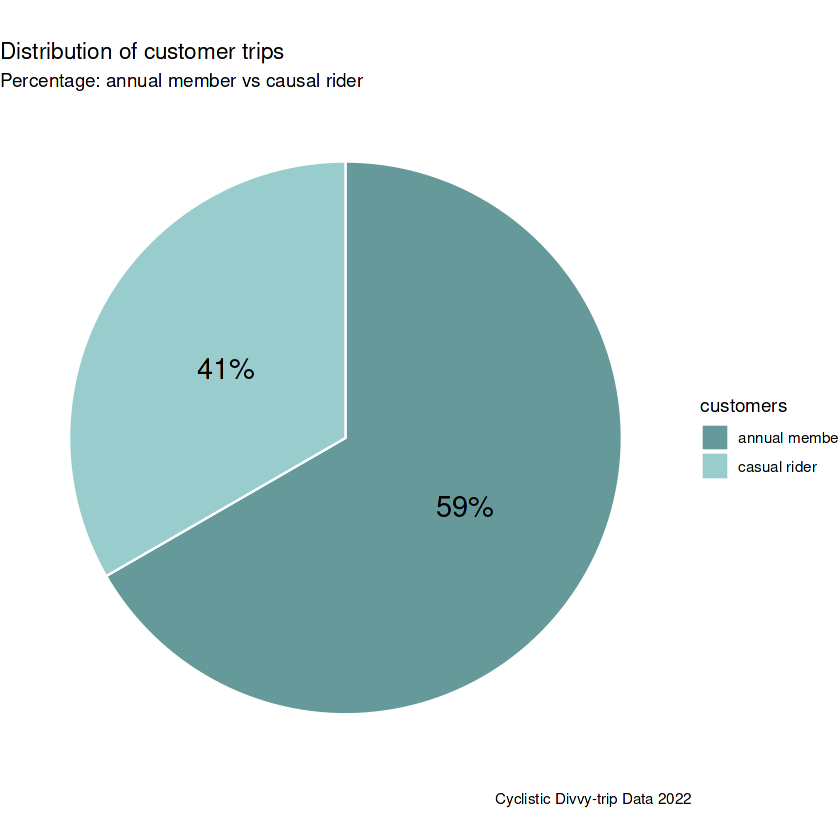

In [188]:
library(scales) #convert data to a percentage
all_trips %>% 
  group_by(customers) %>% 
  summarize("no. of trips" = n(), "Total trips" = nrow(all_trips), "percentage" = percent(n()/nrow(all_trips))) %>% 
  ggplot(aes(x="", y= percentage, fill=customers)) +
  geom_col() + geom_bar(stat="identity", width=1, color="white") +
  scale_fill_manual(values = c("annual member" = "#669999", "casual rider" = "#99CCCC")) +
  coord_polar(theta = "y") +
  theme_void() +
  geom_text(aes(label = percentage), color = "black", size=6, position = position_stack(vjust = 0.5)) +
  labs(title="Distribution of customer trips", subtitle = "Percentage: annual member vs causal rider", caption = "Cyclistic Divvy-trip Data 2022")

We would have to do further visualization of the `all_trips` dataset to get a better insight into the pattern of trips made by customers based on rides taken per: 

* month
* day of the week
* hour

### Step 15: Visualization of customer trips per month

Apart from the knowledge that annual members make more tips compared to casual riders, the plot below shows that casual riders made fewer trips during the colder seasons (Nov–Apr) and more during the summer.

`summarise()` has grouped output by 'customers'. You can override using the
`.groups` argument.


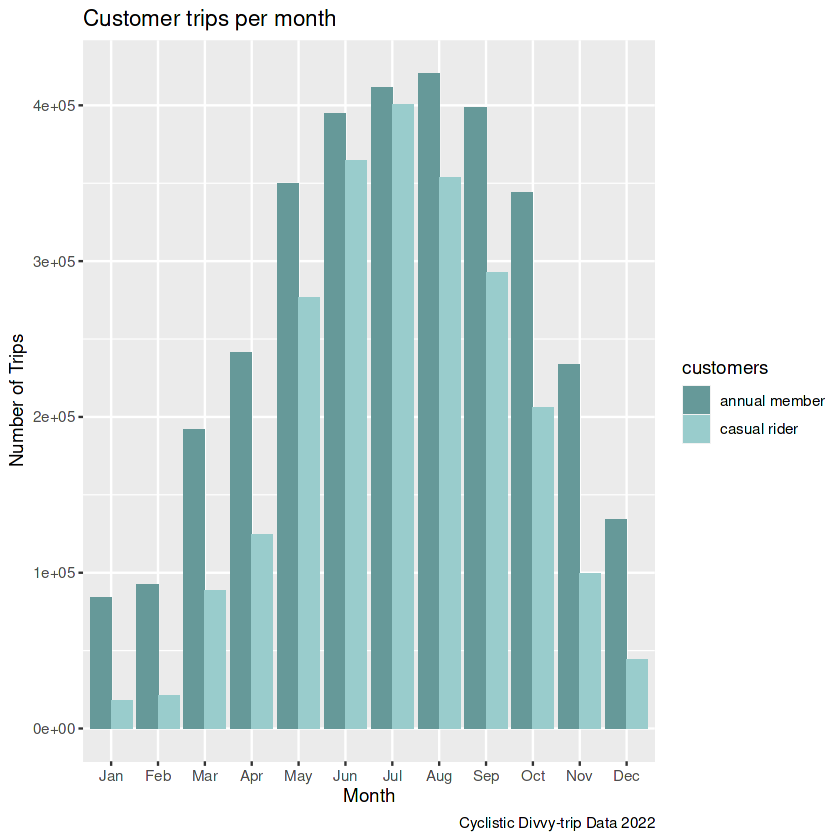

In [189]:
ggplot(all_trips %>% 
 group_by(customers, month) %>% 
 summarise(number_of_rides = n())) +
 geom_col(position="dodge", mapping= aes(x = month, y = number_of_rides, fill = customers)) + 
 scale_fill_manual(values = c("annual member" = "#669999", "casual rider" = "#99CCCC")) +
 labs(title="Customer trips per month",caption = "Cyclistic Divvy-trip Data 2022",x="Month", y="Number of Trips")

### Step 16: Visualization of customer trips per day of the week

The plot below shows that there is no significant difference in how annual members and casual riders use Cyclistic bikes on weekends, but that annual members use bikes significantly more on weekdays.

`summarise()` has grouped output by 'customers'. You can override using the
`.groups` argument.


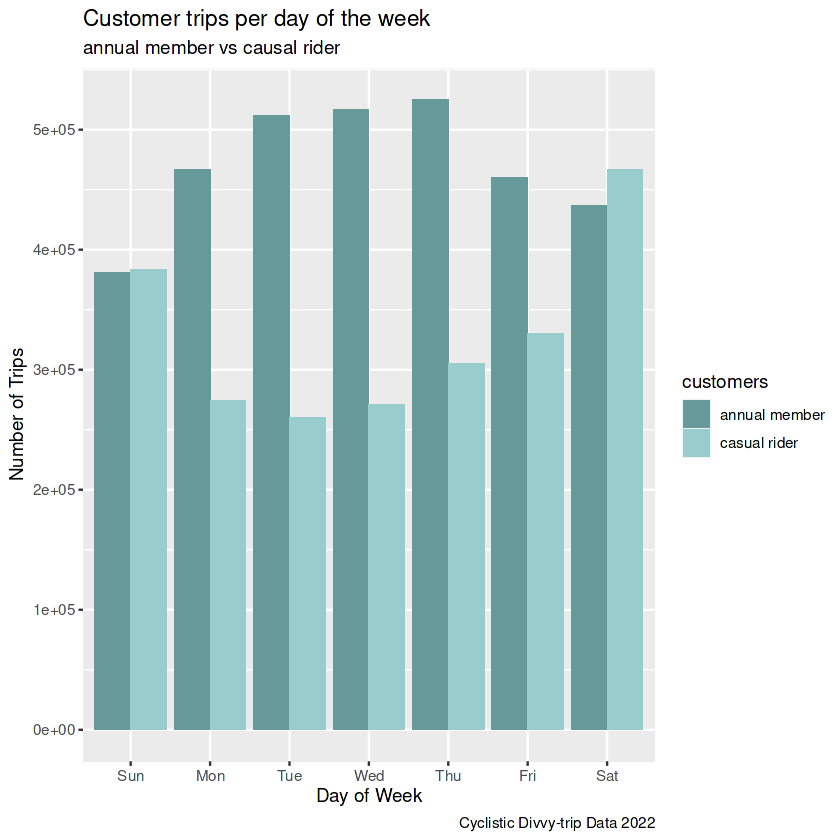

In [190]:
ggplot(all_trips %>% 
 group_by(customers, weekday) %>% 
 summarise(number_of_rides = n())) +
 geom_col(position="dodge", mapping= aes(x = weekday, y = number_of_rides, fill = customers)) + 
 scale_fill_manual(values = c("annual member" = "#669999", "casual rider" = "#99CCCC")) +
 labs(title="Customer trips per day of the week", subtitle = "annual member vs causal rider",caption = "Cyclistic Divvy-trip Data 2022",x="Day of Week",y="Number of Trips")


It will be interesting to see how customers use Cyclistic bikes on average per day of the week in order to better understand the pattern of average trip duration per customer type.


### Step 17: Visualization of the average trip duration by customers per day of the week

According to the graph below, casual riders use Cyclistic Bikes on average for significantly more time per day of the week than annual members.


`summarise()` has grouped output by 'customers'. You can override using the
`.groups` argument.


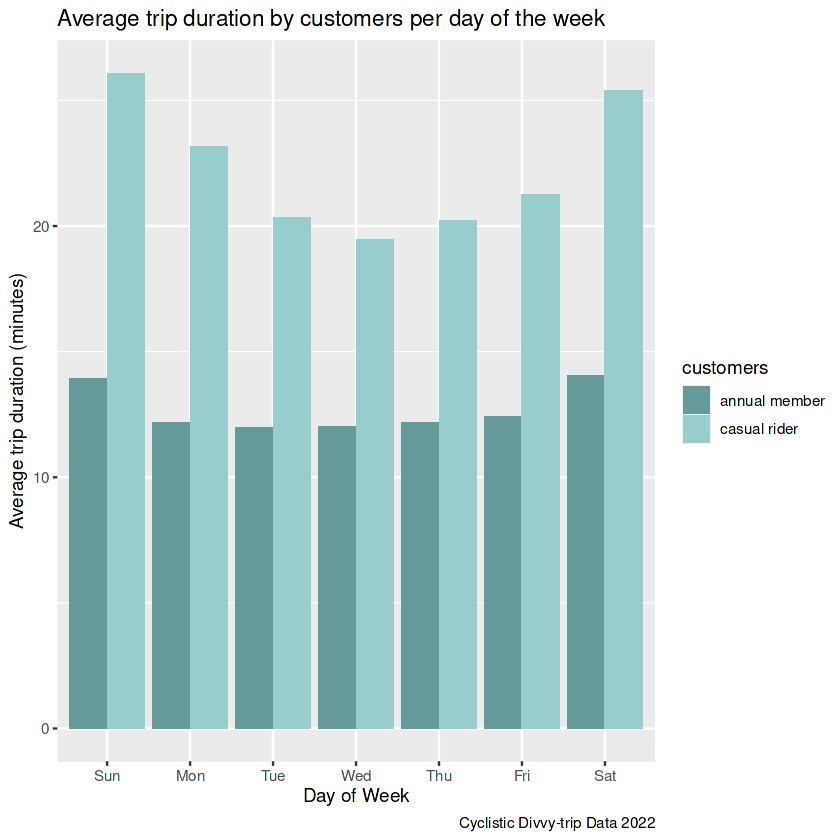

In [191]:
#Average trip duration by customers per days of the week
ggplot(all_trips %>%
  group_by(customers, weekday) %>% 
  summarise(number_of_trips = n(), average_trip_time = mean(ride_duration))) +
  geom_col(position="dodge", mapping= aes(x = weekday, y = average_trip_time, fill = customers)) + 
  scale_fill_manual(values = c("annual member" = "#669999", "casual rider" = "#99CCCC")) +
  labs(title="Average trip duration by customers per day of the week", caption = "Cyclistic Divvy-trip Data 2022",x="Day of Week", y="Average trip duration (minutes)")

Based on the above visualization, we can conclude that casual riders rode longer distances than annual members do and that annual members use the Cyclistic bikes more frequently on weekdays. It will be essential to understand how they use the bikes on weekdays and weekends on an hourly basis.

### Step 18: Visualization of customer trips per hour during the weekdays

According to the plot below, annual members appear to have two peak periods between 6am and 10am and 3pm and 7pm, suggesting that they generally adhere to using the Cyclistic bikes to and from work. Conversely, casual riders only experience one significant peak during the day, which occurs between 3 and 7pm.

`summarise()` has grouped output by 'customers'. You can override using the
`.groups` argument.


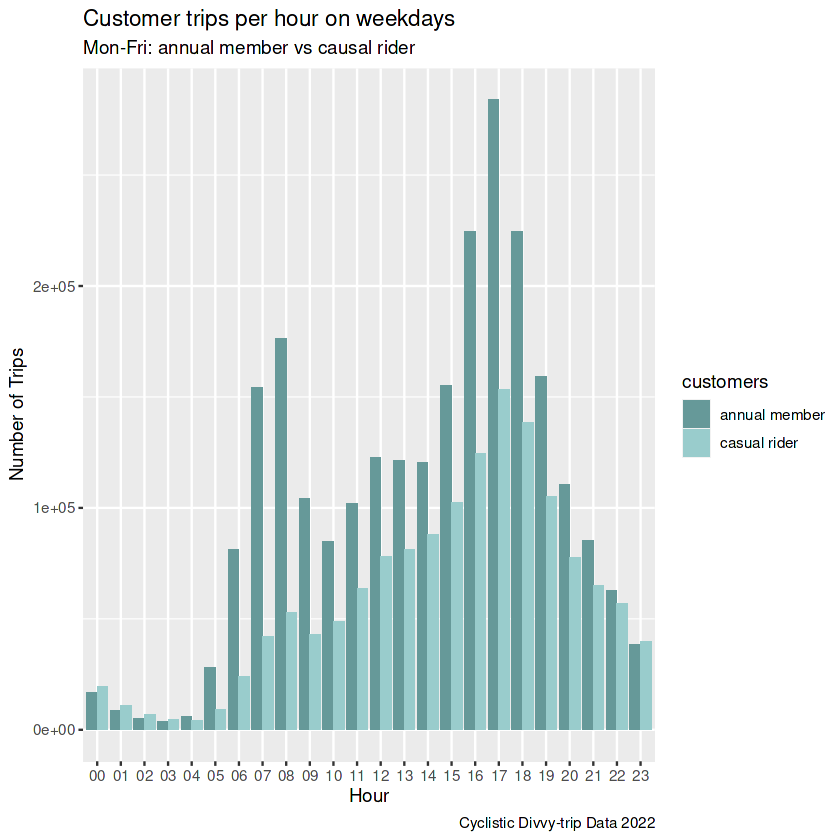

In [192]:
ggplot(all_trips %>%
  filter(weekday %in% c("Mon","Tue","Wed","Thu","Fri")) %>% # Checking for matching values in vectors with the%in% operator      
  group_by(customers, hour) %>% 
  summarise(number_of_rides = n())) +
  geom_col(position="dodge", mapping= aes(x = hour, y = number_of_rides, fill = customers)) + 
  scale_fill_manual(values = c("annual member" = "#669999", "casual rider" = "#99CCCC")) +
  labs(title="Customer trips per hour on weekdays", subtitle = "Mon-Fri: annual member vs causal rider",caption = "Cyclistic Divvy-trip Data 2022",x="Hour", y="Number of Trips") 

### Step 19: Visualization of customers' average trip duration per hour on weekdays

The plot below shows the consistency of average trip duration for annual members along with the fact that casual riders rode longer distances on weekdays.

`summarise()` has grouped output by 'customers'. You can override using the
`.groups` argument.


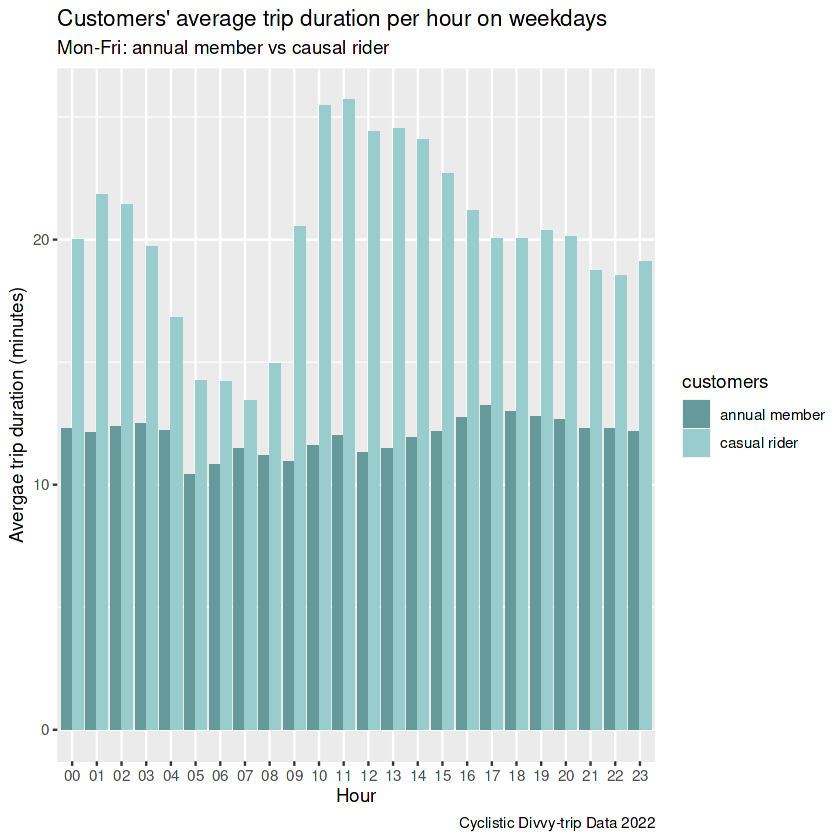

In [193]:
ggplot(all_trips %>%
  filter(weekday %in% c("Mon","Tue","Wed","Thu","Fri")) %>%       
  group_by(customers, hour) %>% 
  summarise(average_ride_duration = mean(ride_duration))) +
  geom_col(position="dodge", mapping= aes(x = hour, y = average_ride_duration, fill = customers)) + 
  scale_fill_manual(values = c("annual member" = "#669999", "casual rider" = "#99CCCC")) +
  labs(title="Customers' average trip duration per hour on weekdays", subtitle = "Mon-Fri: annual member vs causal rider", caption = "Cyclistic Divvy-trip Data 2022",x="Hour", y="Avergae trip duration (minutes)") 

### Step 20: Visualization of customer trips per hour on weekends.

The plot below shows that there was no statistically significant difference in customer bike usage over the weekend, with their peak hours falling between 11am and 6pm.

`summarise()` has grouped output by 'customers'. You can override using the
`.groups` argument.


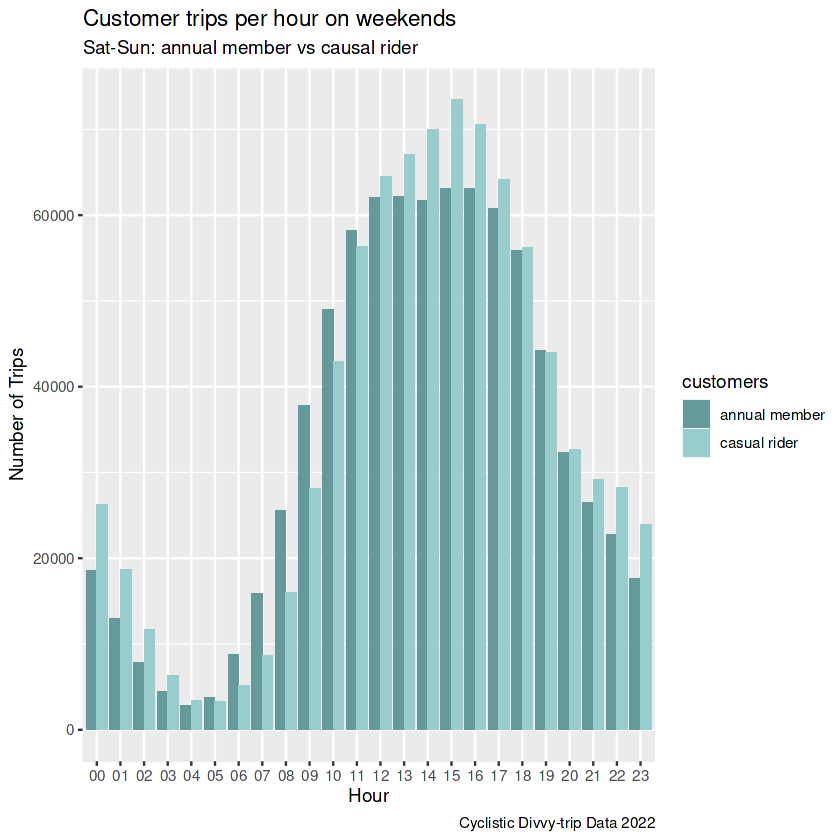

In [194]:
ggplot(all_trips %>%
  filter(weekday %in% c("Sat","Sun")) %>%       
  group_by(customers, hour) %>% 
  summarise(number_of_rides = n())) +
  geom_col(position="dodge", mapping= aes(x = hour, y = number_of_rides, fill = customers)) + 
  scale_fill_manual(values = c("annual member" = "#669999", "casual rider" = "#99CCCC")) +
  labs(title="Customer trips per hour on weekends", subtitle = "Sat-Sun: annual member vs causal rider",caption = "Cyclistic Divvy-trip Data 2022",x="Hour",y="Number of Trips") 

### Step 21: Visualization of customers' average trip duration per hour on weekends

The plot below shows the consistency of average trip time for annual members along with the fact that casual riders rode longer distances on weekends.

`summarise()` has grouped output by 'customers'. You can override using the
`.groups` argument.


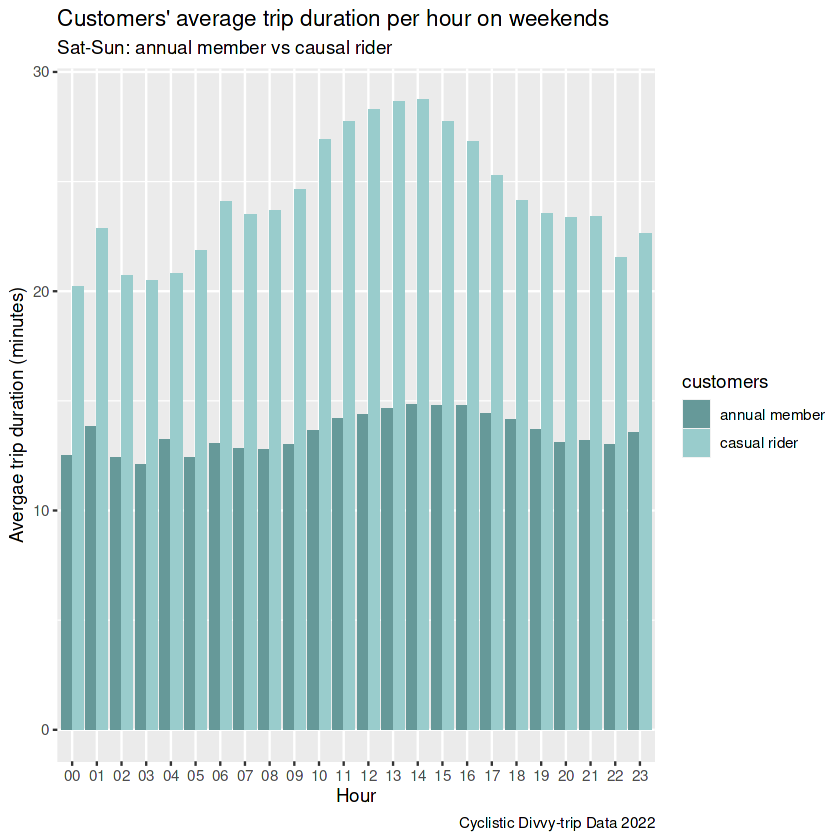

In [195]:
ggplot(all_trips %>%
  filter(weekday %in% c("Sat","Sun")) %>%       
  group_by(customers, hour) %>% 
  summarise(average_ride_duration = mean(ride_duration))) +
  geom_col(position="dodge", mapping= aes(x = hour, y = average_ride_duration, fill = customers)) + 
  scale_fill_manual(values = c("annual member" = "#669999", "casual rider" = "#99CCCC")) +
  labs(title="Customers' average trip duration per hour on weekends", subtitle = "Sat-Sun: annual member vs causal rider",caption = "Cyclistic Divvy-trip Data 2022",x="Hour", y="Avergae trip duration (minutes)") 

### Step 22: Visualization of customer trips by bike type

The plot below indicates that both customers preferred electric bikes and Classic bikes, though casual riders used all three types of Cyclistic bikes.

`summarise()` has grouped output by 'customers'. You can override using the
`.groups` argument.


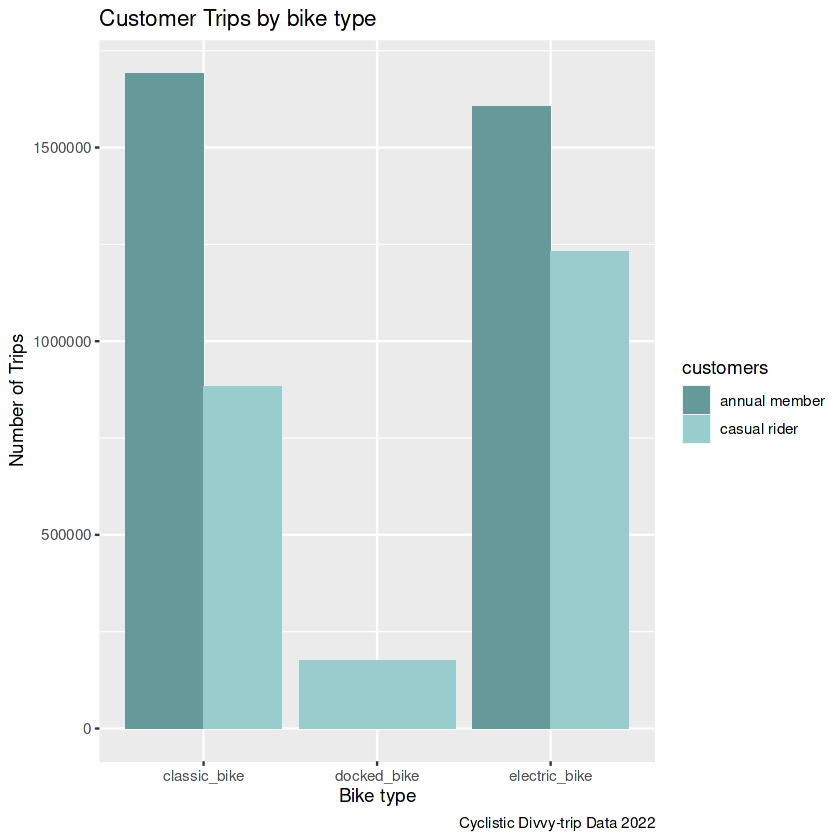

In [196]:
all_trips %>% 
  group_by(customers, bike_type) %>% 
  summarize(no_of_trips=n()) %>% 
  ggplot(aes(x=bike_type, y=no_of_trips, fill = customers)) +
  geom_col(position="dodge") +
  scale_fill_manual(values = c("annual member" = "#669999", "casual rider" = "#99CCCC")) +
  labs(title="Customer Trips by bike type", caption = "Cyclistic Divvy-trip Data 2022", x="Bike type", y="Number of Trips") 

It would be helpful to take a look at the most popular start stations to see if there is a pattern among the various customer types.

### Step 23: Visualization of the Top 30 Start Stations Based on Customer Type

The plot below shows that Annual members started more trips on Kingsbury St. and Kinzie St., whereas Casual riders started more trips on Streeter Dr. and Grand Ave. Only four start stations are shared by both customer types.

`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


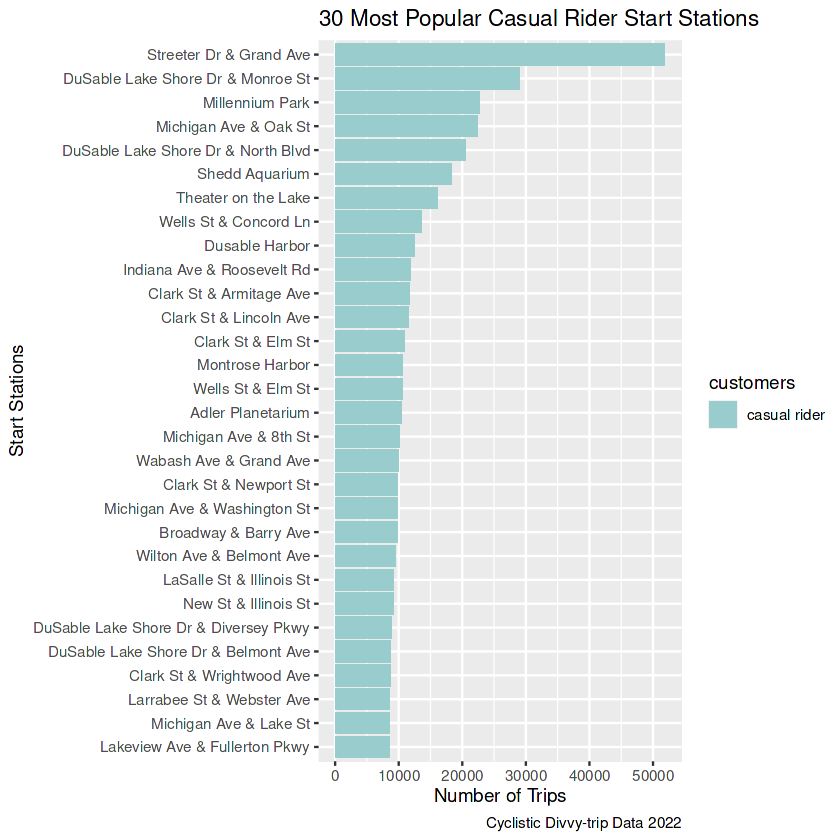

In [197]:
#visualize 30 Most Popular Casual Rider Start Stations
ggplot(all_trips %>% 
    drop_na() %>% 
    filter(customers %in% "casual rider") %>% 
    group_by(start_station_name, customers) %>%
    summarize(count=n()) %>% 
    arrange(desc(count)) %>% 
    head(30)) +
    scale_fill_manual(values = ("casual rider" = "#99CCCC")) +
    geom_col(position="dodge", mapping = aes(x = count, y= reorder(start_station_name, count), fill= customers)) +
    labs(title="30 Most Popular Casual Rider Start Stations", caption = "Cyclistic Divvy-trip Data 2022", x="Number of Trips", y="Start Stations")

`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


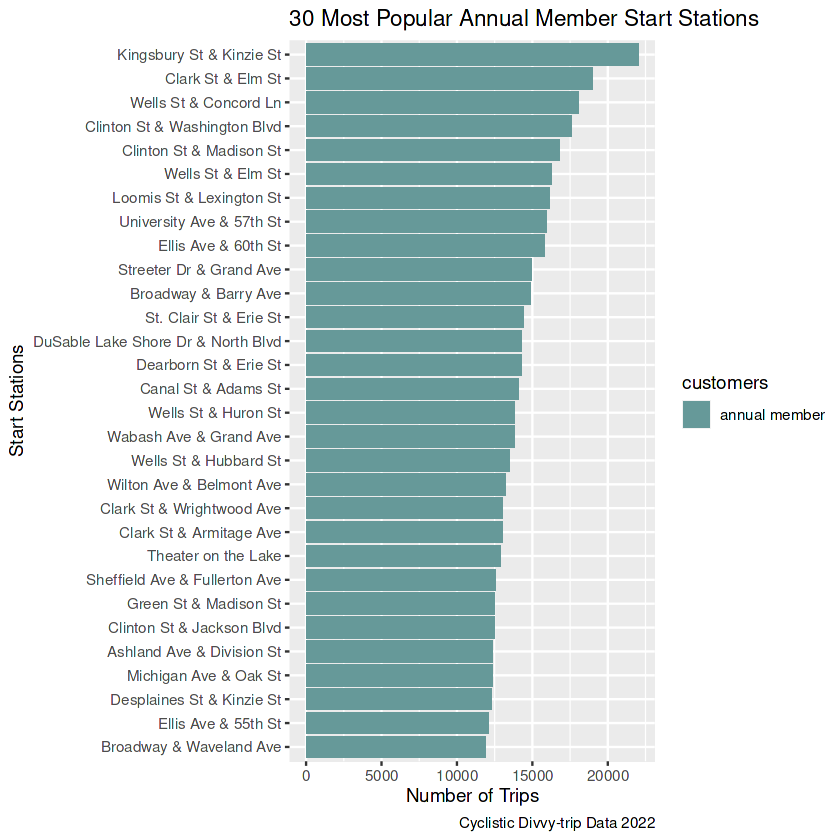

In [198]:
#Visualize 30 Most Popular Annual Member Start Stations
ggplot(all_trips %>% 
           drop_na() %>% 
           filter(customers %in% "annual member") %>% 
           group_by(start_station_name, customers) %>%
           summarize(count=n()) %>% 
           arrange(desc(count)) %>% 
           head(30)) +
    scale_fill_manual(values = ("annual member" = "#669999")) +
    geom_col(position="dodge", mapping = aes(x = count, y= reorder(start_station_name, count), fill= customers)) +
    labs(title="30 Most Popular Annual Member Start Stations", caption = "Cyclistic Divvy-trip Data 2022", x="Number of Trips", y="Start Stations")

After reviewing the trends in their starting stations, it would be intriguing to look at the routes that the various customer types take.

### Step 24: Visualization of the Top 30 Customer Routes

According to the plot below, Casual riders rode more frequently along the same routes, whereas Annual Members traveled more but started and ended at very different locations.

In [199]:
#Create a "route" column
all_trips$route <- paste(all_trips$start_station_name, "-", all_trips$end_station_name)

In [200]:
colnames(all_trips)

[1] "ride_id"            "bike_type"          "started_ride_at"   
 [4] "ended_ride_at"      "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "customers"          "ride_duration"      "day_of_week"       
[16] "weekday"            "date"               "month_no"          
[19] "month"              "day"                "year"              
[22] "hour"               "route"

In [201]:
str(all_trips)

tibble [5,588,908 × 23] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5588908] "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ bike_type         : chr [1:5588908] "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_ride_at   : POSIXct[1:5588908], format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_ride_at     : POSIXct[1:5588908], format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr [1:5588908] "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr [1:5588908] "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr [1:5588908] "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr [1:5588908] "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num [1:5588908] 42 42 

`summarise()` has grouped output by 'route'. You can override using the
`.groups` argument.


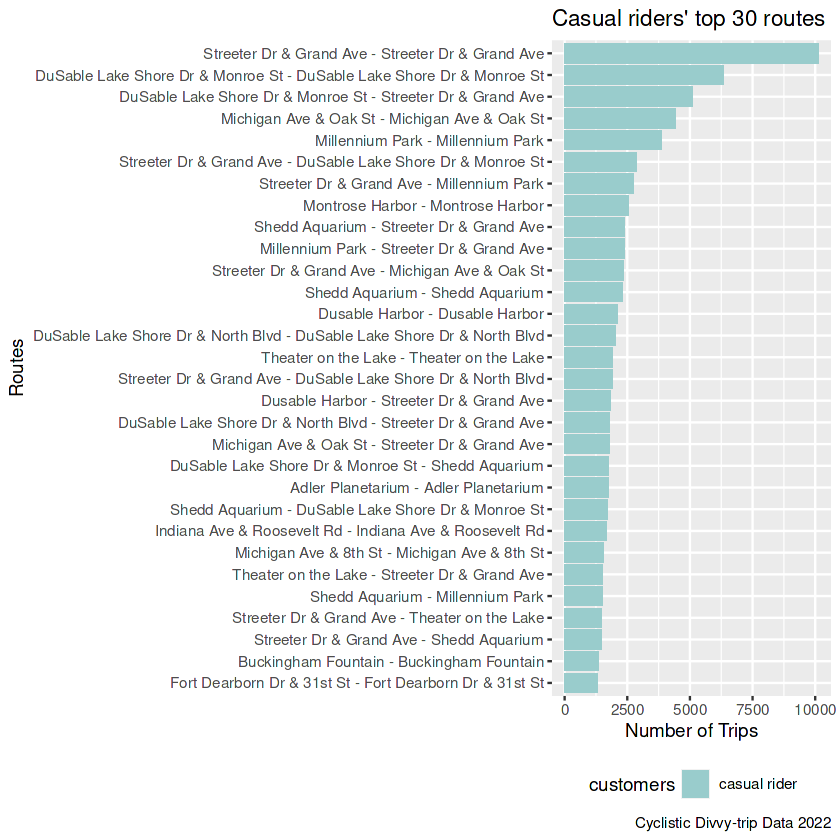

In [202]:
#Visualize Casual riders' top 30 routes
ggplot(all_trips %>% 
    drop_na() %>% 
    filter(customers %in% "casual rider") %>%  
    group_by(route, customers) %>%
    summarize(count=n()) %>% 
    arrange(-count) %>% 
    head(30)) + 
    geom_col(position="dodge", mapping = aes(x = count, y= reorder(route, count), fill= customers)) +
    scale_fill_manual(values = ("casual rider" = "#99CCCC")) +
    theme(legend.position = "bottom") +
    labs(title="Casual riders' top 30 routes", caption = "Cyclistic Divvy-trip Data 2022", x="Number of Trips", y="Routes") 

`summarise()` has grouped output by 'route'. You can override using the
`.groups` argument.


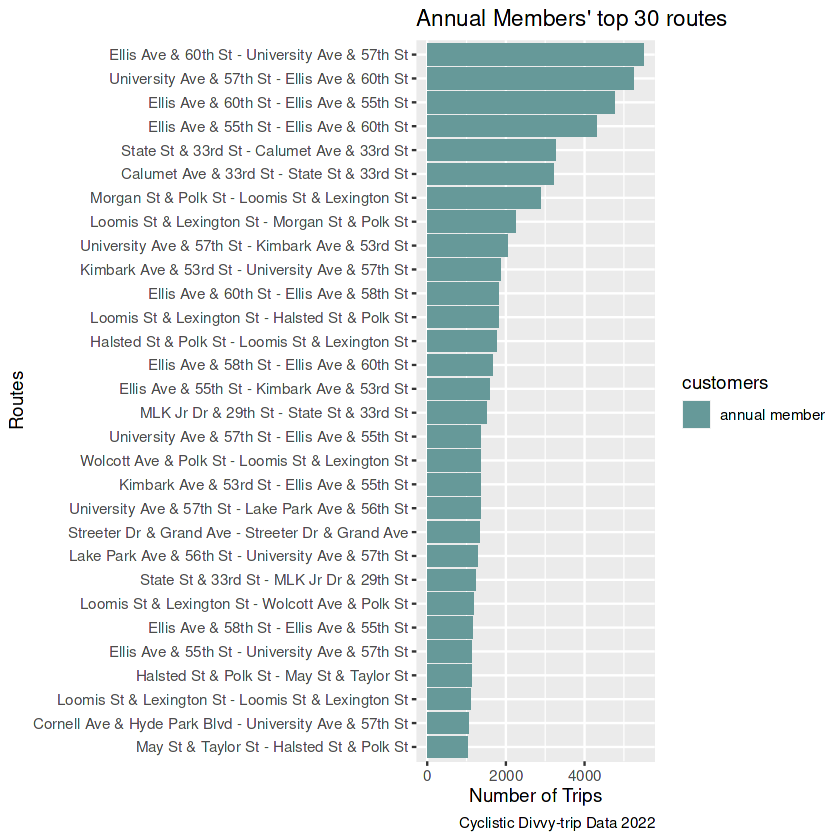

In [203]:
ggplot(all_trips %>% 
    drop_na() %>% 
    filter(customers %in% "annual member") %>%  
    group_by(route, customers) %>%
    summarize(count=n()) %>% 
    arrange(-count) %>% 
    head(30)) + 
    geom_col(position="dodge", mapping = aes(x = count, y= reorder(route, count), fill= customers)) +
    scale_fill_manual(values = ("annual member" = "#669999")) +
    labs(title="Annual Members' top 30 routes", caption = "Cyclistic Divvy-trip Data 2022", x="Number of Trips", y="Routes")

## Act


### Step 25: Findings

Based on the analysis, the following are my findings:

* Annual members made about 59% of total trips, compared to the 41% made by casual riders
* Casual riders made fewer trips during the colder seasons (Nov-Apr) and more during the summer, implying that they are either Chicago city residents or guests or tourists, which was not explicitly stated in the data.
* The patterns in the hourly data show that annual members generally ride Cyclistic bikes to and from work on weekdays, implying that they are Chicago residents.
* Casual riders rode more frequently along the same routes while Annual Members traveled more but started and ended at very different locations
* All three Cyclistic bike types were used by casual riders, but both customers preferred electric bikes and Classic bikes
* Annual members started more trips from Kingsbury St. & Kinzie St., while Casual riders started more trips from Streeter Dr. & Grand Ave


### Step 26: Recommendations

Based on the findings of the analysis, the following recommendations have been made:

* **Rectify existing data inconsistencies**, such as null start and end station names, inconsistent station IDs, non-unique ride IDs, and trip lengths (in minutes) that are less than or equal to zero.
* **Collect more specific data for further analysis.** To better understand the customers and enable a more targeted marketing strategy, information about the riders' age, gender, occupation, residence, and other characteristics should be gathered.
* **Identify residents who are casual riders.** They can be targeted with the marketing campaign.